# Perceptron 

In this notebook, we will use the  perceptron to learn a linear classfier for 2 classes of the iris dataset. 


In [1]:
import numpy as np
import csv
import sys 
import matplotlib.pyplot as plt 

## Perceptron Class
Here the Perceptron is implemented as an object.

In [2]:
class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01, weights
                = None ):
        self.threshold = threshold
        self.learning_rate = learning_rate
        if weights == None: 
            self.weights = np.zeros(no_of_inputs + 1)
        else:
            self.weights = weights #allow user to initalize weights
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] #first 
        #term is bias term
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for i in range(self.threshold):
            change = 0 
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                if (label - prediction) == 0:
                    change += 1

## Read Data

Reads the csv file of the iris dataset. Note that this iris dataset only has 2 classes of flowers.

In [3]:
path = "../../data/Chp2/iris_dataset-Copy1.csv"

def generate_inputs(path):
    with open(path, 'r') as f:
        data = csv.reader(f, delimiter=',')        
        labels = [] 
        training_inputs = [] 
        for i, line in enumerate(data):
            if i == 0:
                features = line
            else:
                if i == 1:
                    zero_encode = line[-1] #used for one hot encoding 
                if line[-1] == zero_encode:
                    labels.append(0)
                else:
                    labels.append(1)
                training_inputs.append(np.array(line[:-1]).astype('float64'))
        labels = np.array(labels).astype('float64')
        return np.array(features), training_inputs, labels
    
features, training_inputs, labels = generate_inputs(path) 

## Testing and Training 
Splits the data into a test set and a training set based on the conventional 80% to 20% split. The data is also shuffled. 

In [4]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    
features, training_inputs, labels = generate_inputs("../../data/Chp2/iris_dataset-Copy1.csv") 
perc_obj = Perceptron(len(training_inputs[0]),100)
for _ in range(20):
    shuffle(training_inputs,labels)

index_80 = int(0.8*len(training_inputs)) #index of 80% 
perc_obj.train(training_inputs[:index_80], labels[:index_80])

## Results
Displays the error rates and also plots the learned decision boundary. 

training error: 0.0
test error:  0.0
line equation: y = -0.72x + 2.22


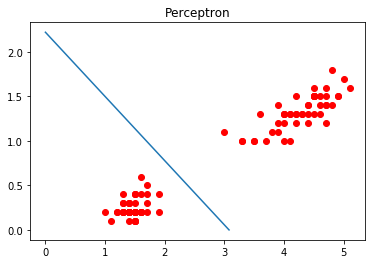

In [5]:
def calculate_error(weights, training_inputs, labels):
    count = 0
    for i in range(len(training_inputs)):
        summation = np.dot(training_inputs[i], weights[1:]) + weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0  
        if activation != labels[i]:
            count += 1
    return count/len(labels)
    
print("training error:", calculate_error(perc_obj.weights, training_inputs[:index_80], labels[:index_80]))
print("test error: ", calculate_error(perc_obj.weights, training_inputs[index_80:], labels[index_80:]))
print("line equation: y = %0.2fx + %0.2f" %(-perc_obj.weights[1]/perc_obj.weights[2],-perc_obj.weights[0]/perc_obj.weights[2]))
x1 = [x[0] for x in training_inputs]
x2 = [x[1] for x in training_inputs]

linex = [0, -perc_obj.weights[0]/perc_obj.weights[1]]
liney = [-perc_obj.weights[0]/perc_obj.weights[2], 0]

plt.plot(linex, liney) 
plt.plot(x1, x2, 'ro')
plt.title("Perceptron")
plt.show()

